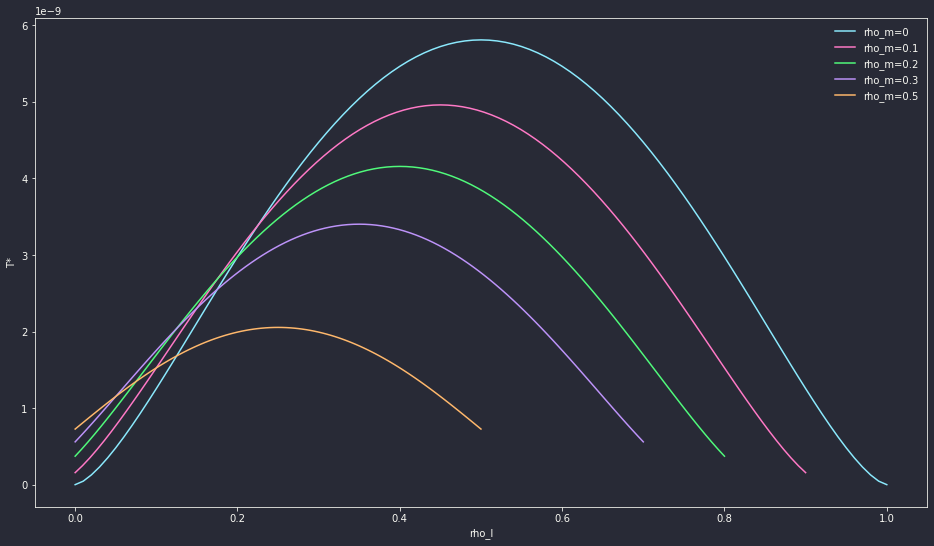

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)
plt.style.use("~/.dracula.mplstyle")

def Tstar(a, b, p, sig, gamma, r_l, r_u, r_m):
    return np.power(((a-b)**2 / (4* p**2 * sig**2)) * (r_l + r_u - (r_l - r_u)**2),(1/(2*gamma)))

b = 556
a = 556.5
p = 556.25
sig = 0.25
gamma = 1/3

rho_m = [0, 0.1, 0.2, 0.3, 0.5]
for r_m in rho_m:
    r_l = np.linspace(0, 1-r_m, 101)
    r_u = -r_l  + 1 - r_m
    T = Tstar(a, b, p, sig, gamma, r_l, r_u, r_m)
    plt.plot(r_l, T, label=f"rho_m={r_m}")

plt.xlabel("rho_l")
plt.ylabel("T*")
plt.legend()
plt.show()

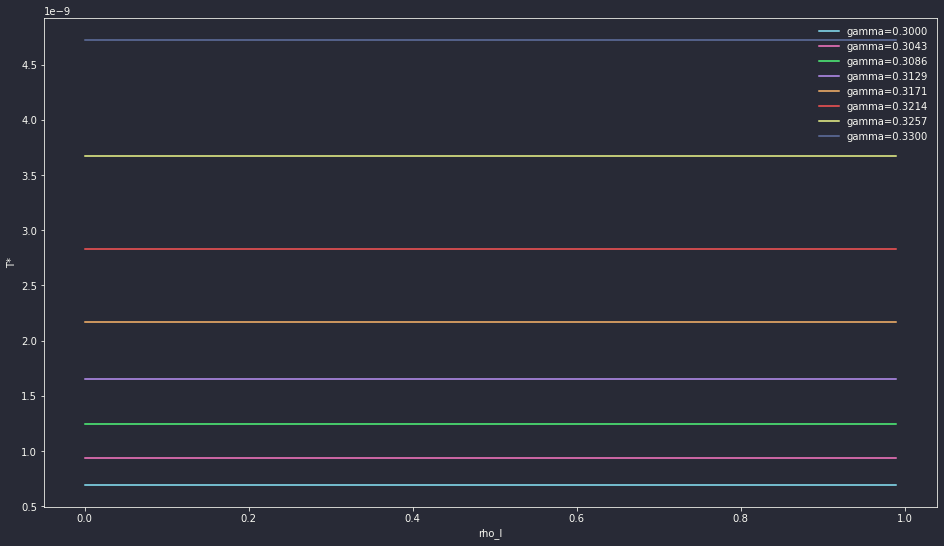

In [2]:
def Tstar(a, b, p, sig, gamma, r_l, r_u, r_m):
    return np.power(((a-b)**2 / (4* p**2 * sig**2)) * (r_l + r_u),(1/(2*gamma)))

b = 556
a = 556.5
p = 556.25
sig = 0.25
gamma_l = np.linspace(0.3, .33, 8)
r_m = 0.01

for gamma in gamma_l:
    r_l = np.linspace(0, 1-r_m, 101)
    r_u = -r_l  + 1 - r_m
    T = Tstar(a, b, p, sig, gamma, r_l, r_u, r_m)
    plt.plot(r_l, T, label=f"gamma={gamma:.4f}")

plt.xlabel("rho_l")
plt.ylabel("T*")
plt.legend()
plt.show()

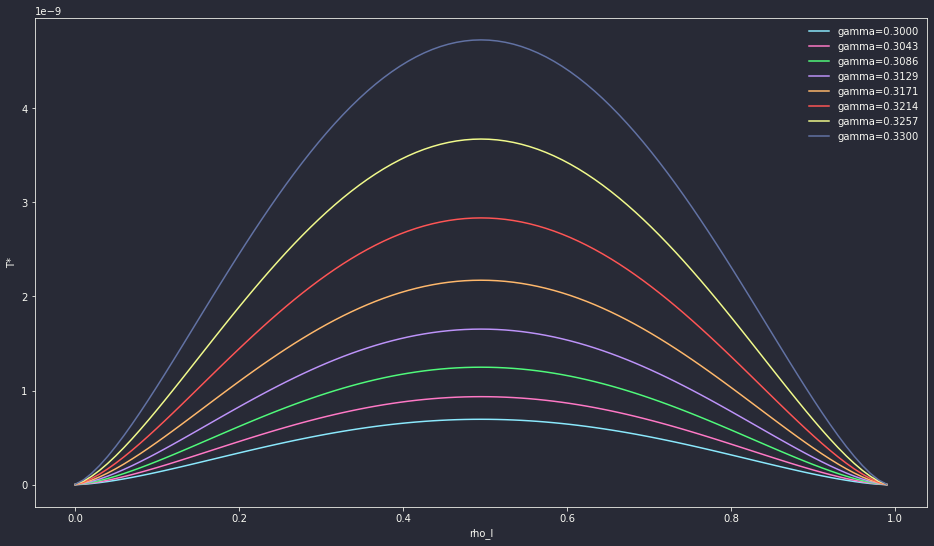

In [3]:
def Tstar(a, b, p, sig, gamma, r_l, r_u, r_m):
    return np.power(((a-b)**2 / (4* p**2 * sig**2)) * (4*r_u*(1-r_u) + r_m*(1-4*r_u)),(1/(2*gamma)))

b = 556
a = 556.5
p = 556.25
sig = 0.25
gamma_l = np.linspace(0.3, .33, 8)
r_m = 0.01

for gamma in gamma_l:
    r_l = np.linspace(0, 1-r_m, 101)
    r_u = -r_l  + 1 - r_m
    T = Tstar(a, b, p, sig, gamma, r_l, r_u, r_m)
    plt.plot(r_l, T, label=f"gamma={gamma:.4f}")

plt.xlabel("rho_l")
plt.ylabel("T*")
plt.legend()
plt.show()

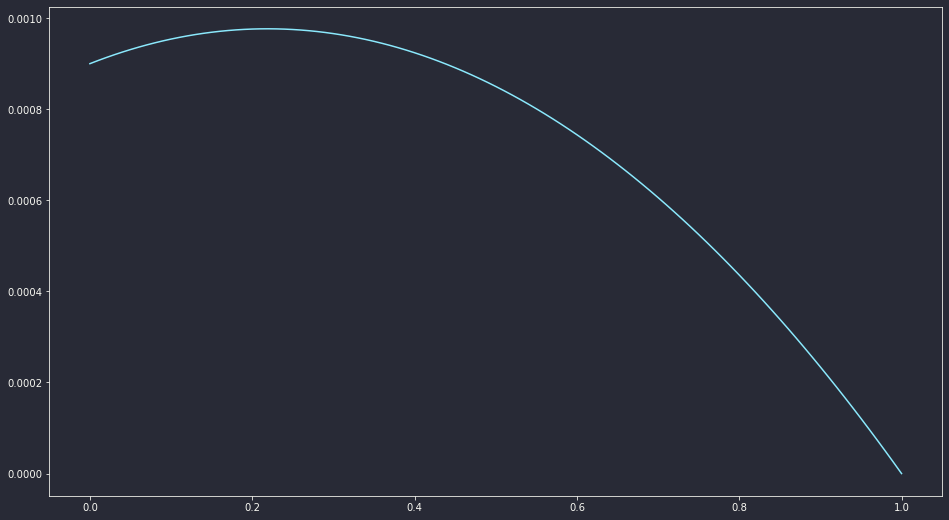

In [4]:
b = 10
a = 10.1
m = (b+a)/2

rho_m = np.linspace(0,1,101)
ratio = np.linspace(0,1,101)
var = []

rt = 0.1
for r_m in rho_m:
    not_r_m = 1-r_m
    r_l = not_r_m * rt
    r_u = not_r_m * (1-rt)

    e = r_l*b + r_u*a + r_m*m
    v = r_l*b**2 + r_u*a**2 + r_m*m**2 - e**2
    var.append(v)

plt.plot(rho_m, var)
plt.show()

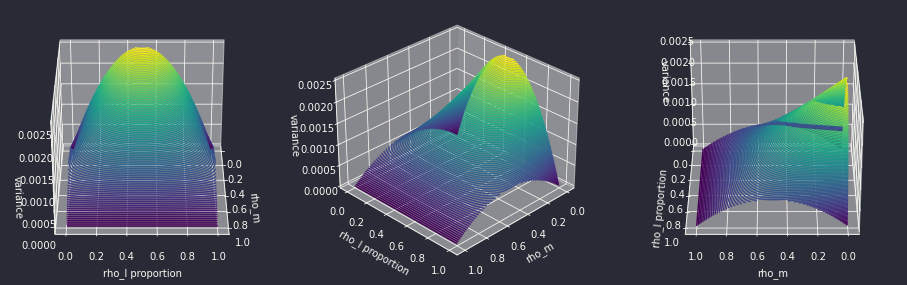

In [5]:
b = 10
a = 10.1
m = (b+a)/2

rho_m = np.linspace(0,1,101)
ratio = np.linspace(0,1,101)

def variance(r_m, rt):
    not_r_m = 1-r_m
    r_l = not_r_m * rt
    r_u = not_r_m * (1-rt)

    e = r_l*b + r_u*a + r_m*m
    v = r_l*b**2 + r_u*a**2 + r_m*m**2 - e**2
    return v

rho_l = []
var = []
for rt in ratio:
    for r_m in rho_m:
        not_r_m = 1-r_m
        r_l = not_r_m * rt
        rho_l.append(r_l)
        r_u = not_r_m * (1-rt)

        e = r_l*b + r_u*a + r_m*m
        v = r_l*b**2 + r_u*a**2 + r_m*m**2 - e**2
        var.append(variance(r_m, rt))

RH, RA = np.meshgrid(rho_m, ratio)
var = np.array(var).reshape(101,101)

fig = plt.figure()
ax = fig.add_subplot(1,3,1,projection='3d')
ax.contour3D(RH, RA, var, 100)
ax.set_xlabel('rho_m')
ax.set_ylabel('rho_l proportion')
ax.set_zlabel('variance')
ax.view_init(30, 0)
ax = fig.add_subplot(1,3,2,projection='3d')
ax.contour3D(RH, RA, var, 100)
ax.set_xlabel('rho_m')
ax.set_ylabel('rho_l proportion')
ax.set_zlabel('variance')
ax.view_init(30, 45)
ax = fig.add_subplot(1,3,3,projection='3d')
ax.contour3D(RH, RA, var, 100)
ax.set_xlabel('rho_m')
ax.set_ylabel('rho_l proportion')
ax.set_zlabel('variance')
ax.view_init(30, 90)

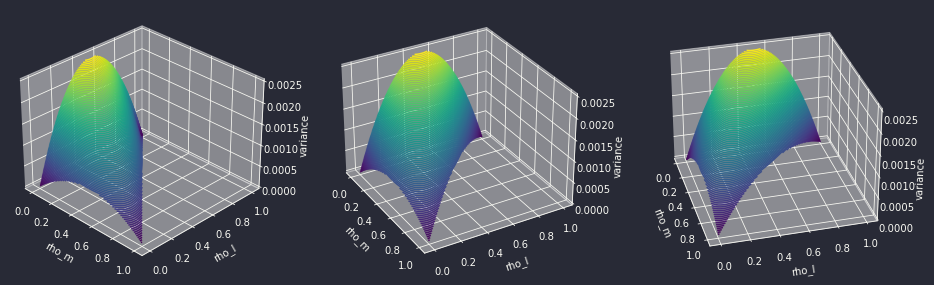

In [6]:
b = 10
a = 10.1
m = (b+a)/2

rho_m = np.linspace(0,1,101)
ratio = np.linspace(0,1,101)

def variance(r_m, rt):
    not_r_m = 1-r_m
    r_l = not_r_m * rt
    r_u = not_r_m * (1-rt)

    e = r_l*b + r_u*a + r_m*m
    v = r_l*b**2 + r_u*a**2 + r_m*m**2 - e**2
    return v

rho_l = []
var = []
for rt in ratio:
    for r_m in rho_m:
        not_r_m = 1-r_m
        r_l = not_r_m * rt
        rho_l.append(r_l)
        r_u = not_r_m * (1-rt)

        e = r_l*b + r_u*a + r_m*m
        v = r_l*b**2 + r_u*a**2 + r_m*m**2 - e**2
        var.append(variance(r_m, rt))

RH, RA = np.meshgrid(rho_m, rho_l[:101])
RA = np.array(rho_l).reshape(101,101)
var = np.array(var).reshape(101,101)

fig = plt.figure()
ax = fig.add_subplot(1,3,1,projection='3d')
ax.contour3D(RH, RA, var, 100)
ax.set_xlabel('rho_m')
ax.set_ylabel('rho_l')
ax.set_zlabel('variance')
ax.view_init(30, 315)
ax = fig.add_subplot(1,3,2,projection='3d')
ax.contour3D(RH, RA, var, 100)
ax.set_xlabel('rho_m')
ax.set_ylabel('rho_l')
ax.set_zlabel('variance')
ax.view_init(30, 330)
ax = fig.add_subplot(1,3,3,projection='3d')
ax.contour3D(RH, RA, var, 100)
ax.set_xlabel('rho_m')
ax.set_ylabel('rho_l')
ax.set_zlabel('variance')
ax.view_init(30, 345)